In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.colors as colors
from IPython.display import HTML
plt.style.use('ggplot')
%matplotlib inline

In [28]:
samples = 1000

data_seed = 42
np.random.seed(data_seed)

#2D-mean of the negative then respectively positive cluster
classMeans = np.vstack([np.array([-1,1]), np.array([1,-1])])
#std of the negative then respectively positive cluster
classStd = [0.75, .5]

#coinflip to determine whetehr a sample is negative or positive
y = np.array([np.random.randint(0,2) for sample in range(samples)])
#based on the class we pick the mean and add some normal random noise
X = np.array([classMeans[label,:] + np.random.randn(2)*classStd[label] for label in y])


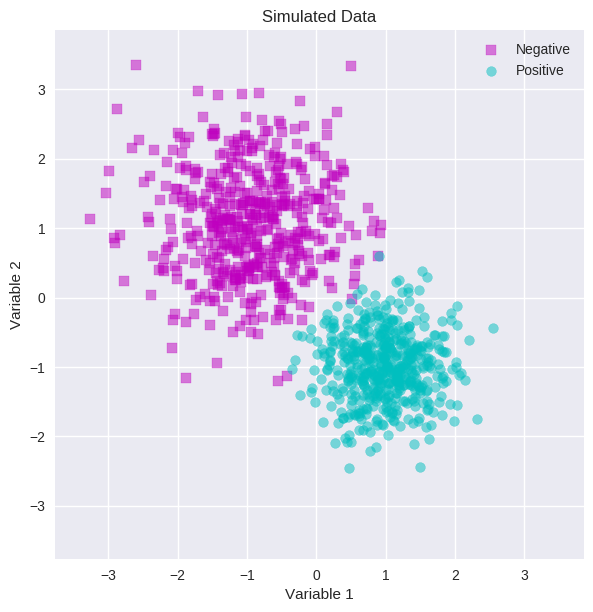

In [69]:
X_min, X_max = X.min(axis = 0), X.max(axis = 0)

x_min, x_max = X_min[0] - .5, X_max[0] + .5
y_min, y_max = X_min[1] - .5, X_max[1] + .5

fig_kwargs = dict(figsize = (7,7), dpi = 100)

fig, ax = plt.subplots(**fig_kwargs)
ax.scatter(X[y == 0,0],X[y ==0,1], c = 'm', alpha = .5, marker = 's', label = 'Negative')
ax.scatter(X[y == 1,0],X[y ==1,1], c = 'c', alpha = .5, marker = 'o', label = 'Positive')
ax.set_title('Simulated Data')
ax.set_xlabel("Variable 1")
ax.set_ylabel("Variable 2")
ax.set_xlim(x_min, y_max)
ax.set_ylim(x_min, y_max)
ax.set_aspect("equal")
ax.legend()
ax.margins(0.5,0)

In [70]:
seed = 56
np.random.seed(seed)

#now we pick random weights and bais to start with
weights_0 = np.random.randn(2)
bias_0  = np.random.randn(1)

In [80]:
def sigmoid(z):
    """logistic sigmoid"""
    return (np.exp(z*(-1)) +1)**(-1)

In [81]:
def predict(X, weights, bias):
    """logistic sigmoid prediction"""
    return sigmoid(np.dot(X,weights) + bias)

In [ ]:
def cross_entropy_loss(y,y_pred):
    """Loss based on negative log-likelihood of the data.
    Target values passed in first"""
    loss = np.zeros(y.shape[0])
    loss[y==1]

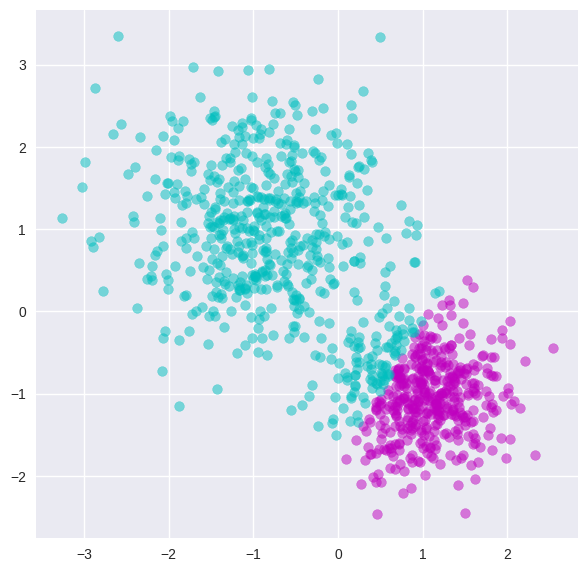

In [84]:
y_pred = predict(X, weights_0, bias_0)
y_pred_label = y_pred >0.5
fig, ax = plt.subplots(**fig_kwargs)
ax.scatter(X[y_pred_label == 0,0], X[y_pred_label == 0,1], c = 'm', alpha = 0.5)
ax.scatter(X[y_pred_label == 1,0], X[y_pred_label == 1,1], c = 'c', alpha = 0.5)